<a href="https://colab.research.google.com/github/VigneshwaraChinnadurai/DL_Works/blob/master/SOM/Self_Organizing_Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This is just to import from G-Drive

#STEP-1: Install Import Libraries
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#STEP-3: Get File from Drive using file-ID

#2.1 Get the file
downloaded = drive.CreateFile({'id':'14K1Hax5C-RjDy9YDF4JHxo4ybA_PlGWz'})
# replace the id with id of file you want to access
downloaded.GetContentFile('Credit_Card_Applications.csv') 

In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [0]:
# Inlining the visualizations
%matplotlib inline

In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [0]:
# This is just to import minsom file from G-Drive

#STEP-1: Install Import Libraries
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#STEP-3: Get File from Drive using file-ID

#2.1 Get the file
downloaded = drive.CreateFile({'id':'1hwVzuL16M9GvIWpoq0KnE3lvPNQtsmcO'})
# replace the id with id of file you want to access
downloaded.GetContentFile('minisom.py') 

In [0]:
# Training the SOM
from minisom import MiniSom
# Thanks to Giuseppe Vettigilli

# Or you can simply pip the command
# pip install -i https://test.pypi.org/simple/ MiniSom==1.0

In [0]:
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
# Here we're reducing the dimensions from 14 to 10
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

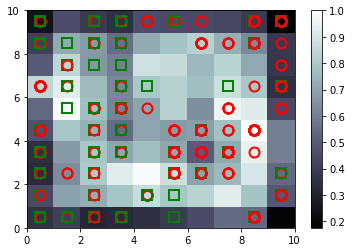

In [11]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [0]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,5)],mappings[(8,4)]), axis = 0)
# By seeing the graph, giving the co-ordinate to fetch the details using the dict.
# Need to give which ever cell has pure or near pure white with values ie circle or square. 
frauds = sc.inverse_transform(frauds)

In [0]:
# So finally we found the list of frauds in our dataset.

# Happy learning.